<a href="https://colab.research.google.com/github/owl-d/Basic_DeepLearning/blob/main/Doit_Ch9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***09-2 순환 신경망을 만들고 텍스트를 분류합니다.***

In [1]:
import numpy as np
from tensorflow.keras.datasets import imdb

In [2]:
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=100)

17473536/17464789 [==============================] - 0s 0us/step


In [3]:
#훈련 세트의 샘플 확인 : 2는 어휘 사전에 없는 단어
print(x_train_all[0])

[2, 2, 22, 2, 43, 2, 2, 2, 2, 65, 2, 2, 66, 2, 2, 2, 36, 2, 2, 25, 2, 43, 2, 2, 50, 2, 2, 2, 35, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 39, 2, 2, 2, 2, 2, 2, 38, 2, 2, 2, 2, 50, 2, 2, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 22, 71, 87, 2, 2, 43, 2, 38, 76, 2, 2, 2, 2, 22, 2, 2, 2, 2, 2, 2, 2, 2, 2, 62, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 66, 2, 33, 2, 2, 2, 2, 38, 2, 2, 25, 2, 51, 36, 2, 48, 25, 2, 33, 2, 22, 2, 2, 28, 77, 52, 2, 2, 2, 2, 82, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 36, 71, 43, 2, 2, 26, 2, 2, 46, 2, 2, 2, 2, 2, 2, 88, 2, 2, 2, 2, 98, 32, 2, 56, 26, 2, 2, 2, 2, 2, 2, 2, 22, 21, 2, 2, 26, 2, 2, 2, 30, 2, 2, 51, 36, 28, 2, 92, 25, 2, 2, 2, 65, 2, 38, 2, 88, 2, 2, 2, 2, 2, 2, 2, 2, 32, 2, 2, 2, 2, 2, 32]


In [4]:
#훈련 세트에서 2 제외 : 2는 어휘 사전에 없는 단어, 0은 패딩, 1은 글의 시작 나타냄
for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]

print(x_train_all[0])

[22, 43, 65, 66, 36, 25, 43, 50, 35, 39, 38, 50, 22, 22, 71, 87, 43, 38, 76, 22, 62, 66, 33, 38, 25, 51, 36, 48, 25, 33, 22, 28, 77, 52, 82, 36, 71, 43, 26, 46, 88, 98, 32, 56, 26, 22, 21, 26, 30, 51, 36, 28, 92, 25, 65, 38, 88, 32, 32]


In [5]:
#어휘 사전 내려받기
word_to_index = imdb.get_word_index()

word_to_index['movie']

1654784/1641221 [==============================] - 0s 0us/step


17

In [6]:
#훈련 세트의 정수를 영단어로 변환
index_to_word = {word_to_index[k]: k for k in word_to_index}

for w in x_train_all[0]:
    print(index_to_word[w - 3], end=' ')

film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [7]:
#훈련 세트 크기 확인
print(x_train_all.shape, y_train_all.shape)

(25000,) (25000,)


In [8]:
#훈련 샘플의 길이 확인 : 샘플의 길이가 다르면 모델을 제대로 훈련시킬 수 없다.
print(len(x_train_all[0]), len(x_train_all[1]))

59 32


In [9]:
#훈련 세트의 타깃 데이터 확인 : 긍정(1)과 부정(0)
print(y_train_all[:10])

[1 0 0 1 0 0 1 0 1 0]


In [10]:
#검증 세트 준비
np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [11]:
#샘플의 길이 맞추기 : 일정 길이가 넘으면 샘플 자르고, 길이가 모자라면 왼쪽에 0을 채운다.
from tensorflow.keras.preprocessing import sequence

maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [12]:
#길이를 조정한 훈련 세트의 크기와 샘플 확인
print(x_train_seq.shape, x_val_seq.shape)

(20000, 100) (5000, 100)


In [13]:
#샘플의 왼쪽에 0이 추가된 것을 확인
print(x_train_seq[0])

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 35 40 27 28 40 22 83 31 85 45
 24 23 31 70 31 76 30 98 32 22 28 51 75 56 30 33 97 53 38 46 53 74 31 35
 23 34 22 58]


In [14]:
#샘플을 원-핫 인코딩하기
from tensorflow.keras.utils import to_categorical

x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

In [15]:
print(x_train_onehot.shape)

(20000, 100, 100)


In [16]:
print(x_train_onehot.nbytes)

800000000


In [17]:
import tensorflow as tf

In [18]:
#순환 신경망 클래스 구현
class RecurrentNetwork:
    
    def __init__(self, n_cells=10, batch_size=32, learning_rate=0.1):
        self.n_cells = n_cells     # 셀 개수
        self.batch_size = batch_size     # 배치 크기
        self.w1h = None            # 은닉 상태에 대한 가중치
        self.w1x = None            # 입력에 대한 가중치
        self.b1 = None             # 순환층의 절편
        self.w2 = None             # 출력층의 가중치
        self.b2 = None             # 출력층의 절편
        self.h = None              # 순환층의 활성화 출력
        self.losses = []           # 훈련 손실
        self.val_losses = []       # 검증 손실
        self.lr = learning_rate    # 학습률

    def forpass(self, x):
        self.h = [np.zeros((x.shape[0], self.n_cells))]   # 은닉 상태를 초기화합니다.
        # 배치 차원과 타임 스텝 차원을 바꿉니다.
        seq = np.swapaxes(x, 0, 1)
        # 순환 층의 선형 식을 계산합니다.
        for x in seq:
            z1 = np.dot(x, self.w1x) + np.dot(self.h[-1], self.w1h) + self.b1
            h = np.tanh(z1)                    # 활성화 함수를 적용합니다.
            self.h.append(h)                   # 역전파를 위해 은닉 상태 저장합니다.
            z2 = np.dot(h, self.w2) + self.b2  # 출력층의 선형 식을 계산합니다.
        return z2

    def backprop(self, x, err):
        m = len(x)       # 샘플 개수
        
        # 출력층의 가중치와 절편에 대한 그래디언트를 계산합니다.
        w2_grad = np.dot(self.h[-1].T, err) / m
        b2_grad = np.sum(err) / m
        # 배치 차원과 타임 스텝 차원을 바꿉니다.
        seq = np.swapaxes(x, 0, 1)
        
        w1h_grad = w1x_grad = b1_grad = 0
        # 셀 직전까지 그래디언트를 계산합니다.
        err_to_cell = np.dot(err, self.w2.T) * (1 - self.h[-1] ** 2)
        # 모든 타임 스텝을 거슬러가면서 그래디언트를 전파합니다.
        for x, h in zip(seq[::-1][:10], self.h[:-1][::-1][:10]):
            w1h_grad += np.dot(h.T, err_to_cell)
            w1x_grad += np.dot(x.T, err_to_cell)
            b1_grad += np.sum(err_to_cell, axis=0)
            # 이전 타임 스텝의 셀 직전까지 그래디언트를 계산합니다.
            err_to_cell = np.dot(err_to_cell, self.w1h) * (1 - h ** 2)
        
        w1h_grad /= m
        w1x_grad /= m
        b1_grad /= m
    
        return w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad
    
    def sigmoid(self, z):
        z = np.clip(z, -100, None)            # 안전한 np.exp() 계산을 위해
        a = 1 / (1 + np.exp(-z))              # 시그모이드 계산
        return a
    
    def init_weights(self, n_features, n_classes):
        orth_init = tf.initializers.Orthogonal()
        glorot_init = tf.initializers.GlorotUniform()
        
        self.w1h = orth_init((self.n_cells, self.n_cells)).numpy() # (셀 개수, 셀 개수)
        self.w1x = glorot_init((n_features, self.n_cells)).numpy() # (특성 개수, 셀 개수)
        self.b1 = np.zeros(self.n_cells)                           # 은닉층의 크기
        self.w2 = glorot_init((self.n_cells, n_classes)).numpy()   # (셀 개수, 클래스 개수)
        self.b2 = np.zeros(n_classes)
        
    def fit(self, x, y, epochs=100, x_val=None, y_val=None):
        y = y.reshape(-1, 1)
        y_val = y_val.reshape(-1, 1)
        np.random.seed(42)
        self.init_weights(x.shape[2], y.shape[1])    # 은닉층과 출력층의 가중치를 초기화합니다.
        # epochs만큼 반복합니다.
        for i in range(epochs):
            print('에포크', i, end=' ')
            # 제너레이터 함수에서 반환한 미니배치를 순환합니다.
            batch_losses = []
            for x_batch, y_batch in self.gen_batch(x, y):
                print('.', end='')
                a = self.training(x_batch, y_batch)
                # 안전한 로그 계산을 위해 클리핑합니다.
                a = np.clip(a, 1e-10, 1-1e-10)
                # 로그 손실과 규제 손실을 더하여 리스트에 추가합니다.
                loss = np.mean(-(y_batch*np.log(a) + (1-y_batch)*np.log(1-a)))
                batch_losses.append(loss)
            print()
            self.losses.append(np.mean(batch_losses))
            # 검증 세트에 대한 손실을 계산합니다.
            self.update_val_loss(x_val, y_val)

    # 미니배치 제너레이터 함수
    def gen_batch(self, x, y):
        length = len(x)
        bins = length // self.batch_size # 미니배치 횟수
        if length % self.batch_size:
            bins += 1                    # 나누어 떨어지지 않을 때
        indexes = np.random.permutation(np.arange(len(x))) # 인덱스를 섞습니다.
        x = x[indexes]
        y = y[indexes]
        for i in range(bins):
            start = self.batch_size * i
            end = self.batch_size * (i + 1)
            yield x[start:end], y[start:end]   # batch_size만큼 슬라이싱하여 반환합니다.
            
    def training(self, x, y):
        m = len(x)                # 샘플 개수를 저장합니다.
        z = self.forpass(x)       # 정방향 계산을 수행합니다.
        a = self.sigmoid(z)       # 활성화 함수를 적용합니다.
        err = -(y - a)            # 오차를 계산합니다.
        # 오차를 역전파하여 그래디언트를 계산합니다.
        w1h_grad, w1x_grad, b1_grad, w2_grad, b2_grad = self.backprop(x, err)
        # 셀의 가중치와 절편을 업데이트합니다.
        self.w1h -= self.lr * w1h_grad
        self.w1x -= self.lr * w1x_grad
        self.b1 -= self.lr * b1_grad
        # 출력층의 가중치와 절편을 업데이트합니다.
        self.w2 -= self.lr * w2_grad
        self.b2 -= self.lr * b2_grad
        return a
   
    def predict(self, x):
        z = self.forpass(x)          # 정방향 계산을 수행합니다.
        return z > 0                 # 스텝 함수를 적용합니다.
    
    def score(self, x, y):
        # 예측과 타깃 열 벡터를 비교하여 True의 비율을 반환합니다.
        return np.mean(self.predict(x) == y.reshape(-1, 1))

    def update_val_loss(self, x_val, y_val):
        z = self.forpass(x_val)            # 정방향 계산을 수행합니다.
        a = self.sigmoid(z)                # 활성화 함수를 적용합니다.
        a = np.clip(a, 1e-10, 1-1e-10)     # 출력 값을 클리핑합니다.
        val_loss = np.mean(-(y_val*np.log(a) + (1-y_val)*np.log(1-a)))
        self.val_losses.append(val_loss)

In [19]:
#순환 신경망 모델 훈련시키기
rn = RecurrentNetwork(n_cells=32, batch_size=32, learning_rate=0.01)

rn.fit(x_train_onehot, y_train, epochs=20, x_val=x_val_onehot, y_val=y_val)

에포크 0 .................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
에포크 1 ..........................................................................................................................................................................................................................................................................................................................................................................

In [20]:
import matplotlib.pyplot as plt

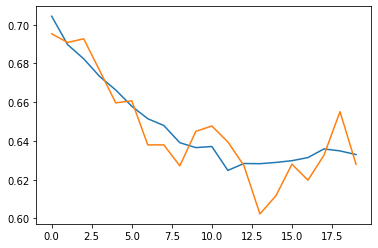

In [21]:
#훈련, 검증 세트에 대한 손실 그래프 그리기 : 그래프가 들쭉날쭉하지만 비교적 손실이 잘 감소한다.
plt.plot(rn.losses)
plt.plot(rn.val_losses)
plt.show()

In [22]:
#검증 세트의 정확도
rn.score(x_val_onehot, y_val)

0.6408

***09-3 텐서플로로 순환 신경망을 만듭니다.***

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

In [24]:
#모델 만들기
model = Sequential()

model.add(SimpleRNN(32, input_shape=(100, 100)))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                4256      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [25]:
#모델 컴파일하고 훈련시키기
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_onehot, y_train, epochs=20, batch_size=32, 
                    validation_data=(x_val_onehot, y_val))

Epoch 1/20
625/625 [==============================] - 13s 19ms/step - loss: 0.6994 - accuracy: 0.5126 - val_loss: 0.6938 - val_accuracy: 0.5230
Epoch 2/20
625/625 [==============================] - 12s 18ms/step - loss: 0.6861 - accuracy: 0.5461 - val_loss: 0.6791 - val_accuracy: 0.5688
Epoch 3/20
625/625 [==============================] - 12s 19ms/step - loss: 0.6583 - accuracy: 0.6053 - val_loss: 0.6366 - val_accuracy: 0.6436
Epoch 4/20
625/625 [==============================] - 12s 19ms/step - loss: 0.6347 - accuracy: 0.6440 - val_loss: 0.6853 - val_accuracy: 0.6058
Epoch 5/20
625/625 [==============================] - 11s 18ms/step - loss: 0.6174 - accuracy: 0.6635 - val_loss: 0.6028 - val_accuracy: 0.6748
Epoch 6/20
625/625 [==============================] - 12s 19ms/step - loss: 0.6078 - accuracy: 0.6734 - val_loss: 0.5899 - val_accuracy: 0.6896
Epoch 7/20
625/625 [==============================] - 12s 18ms/step - loss: 0.5960 - accuracy: 0.6847 - val_loss: 0.5849 - val_accuracy:

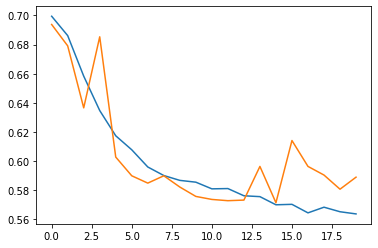

In [26]:
#훈련, 검증 세트에 대한 손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

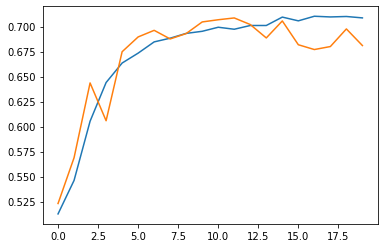

In [27]:
#훈련, 검증 세트에 대한 정확도 그래프 : 과대 적합되는 현상이 보인다.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [28]:
#검증 세트 정확도 평가
loss, accuracy = model.evaluate(x_val_onehot, y_val, verbose=0)
print(accuracy)

0.6809999942779541


In [29]:
#임베딩 클래스 임포트 : 단어를 고정된 길이의 실수 벡터로 임베딩
from tensorflow.keras.layers import Embedding

In [30]:
#훈련 데이터 준비
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(x_train_all)):
    x_train_all[i] = [w for w in x_train_all[i] if w > 2]
    
x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

In [31]:
#샘플 길이 맞추기
maxlen=100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [32]:
#모델 만들기
model_ebd = Sequential()

model_ebd.add(Embedding(1000, 32))
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1, activation='sigmoid'))

model_ebd.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          32000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 8)                 328       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


In [33]:
#모델 컴파일하고 훈련
model_ebd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_ebd.fit(x_train_seq, y_train, epochs=10, batch_size=32, 
                        validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 13s 20ms/step - loss: 0.4920 - accuracy: 0.7745 - val_loss: 0.4213 - val_accuracy: 0.8210
Epoch 2/10
625/625 [==============================] - 12s 19ms/step - loss: 0.3823 - accuracy: 0.8389 - val_loss: 0.4171 - val_accuracy: 0.8268
Epoch 3/10
625/625 [==============================] - 12s 19ms/step - loss: 0.3498 - accuracy: 0.8520 - val_loss: 0.4008 - val_accuracy: 0.8242
Epoch 4/10
625/625 [==============================] - 12s 19ms/step - loss: 0.3274 - accuracy: 0.8634 - val_loss: 0.4089 - val_accuracy: 0.8204
Epoch 5/10
625/625 [==============================] - 12s 19ms/step - loss: 0.3143 - accuracy: 0.8719 - val_loss: 0.4337 - val_accuracy: 0.8122
Epoch 6/10
625/625 [==============================] - 12s 20ms/step - loss: 0.2884 - accuracy: 0.8846 - val_loss: 0.4507 - val_accuracy: 0.8144
Epoch 7/10
625/625 [==============================] - 12s 19ms/step - loss: 0.2780 - accuracy: 0.8888 - val_loss: 0.4627 - val_accuracy:

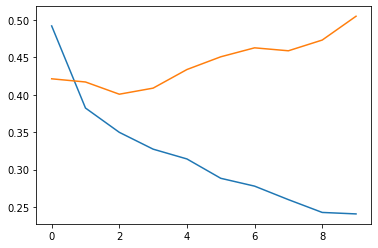

In [34]:
#손실 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

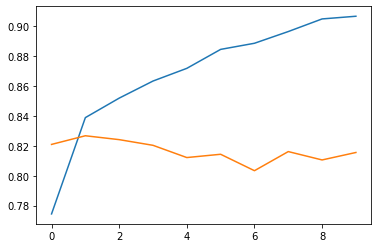

In [35]:
#정확도 그래프
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [36]:
#검증 세트 정확도 평가
loss, accuracy = model_ebd.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.8155999779701233


***09-4 LSTM 순환 신경망을 만들고 텍스트를 분류합니다.***

In [37]:
from tensorflow.keras.layers import LSTM

In [38]:
#LSTM 순환 신경망 만들기
model_lstm = Sequential()

model_lstm.add(Embedding(1000, 32))
model_lstm.add(LSTM(8))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          32000     
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 1312      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 33,321
Trainable params: 33,321
Non-trainable params: 0
_________________________________________________________________


In [39]:
#모델 훈련
model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_lstm.fit(x_train_seq, y_train, epochs=10, batch_size=32, 
                         validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 20s 30ms/step - loss: 0.4475 - accuracy: 0.7986 - val_loss: 0.3994 - val_accuracy: 0.8270
Epoch 2/10
625/625 [==============================] - 18s 29ms/step - loss: 0.3363 - accuracy: 0.8583 - val_loss: 0.3561 - val_accuracy: 0.8416
Epoch 3/10
625/625 [==============================] - 18s 29ms/step - loss: 0.3133 - accuracy: 0.8691 - val_loss: 0.3533 - val_accuracy: 0.8404
Epoch 4/10
625/625 [==============================] - 18s 29ms/step - loss: 0.2976 - accuracy: 0.8748 - val_loss: 0.3567 - val_accuracy: 0.8438
Epoch 5/10
625/625 [==============================] - 18s 29ms/step - loss: 0.2870 - accuracy: 0.8780 - val_loss: 0.3604 - val_accuracy: 0.8348
Epoch 6/10
625/625 [==============================] - 18s 29ms/step - loss: 0.2706 - accuracy: 0.8856 - val_loss: 0.3683 - val_accuracy: 0.8384
Epoch 7/10
625/625 [==============================] - 18s 29ms/step - loss: 0.2603 - accuracy: 0.8918 - val_loss: 0.3776 - val_accuracy:

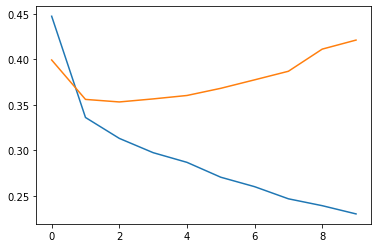

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

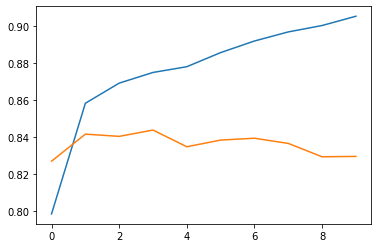

In [41]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [42]:
#검증 세트 정확도 평가
loss, accuracy = model_lstm.evaluate(x_val_seq, y_val, verbose=0)
print(accuracy)

0.8295999765396118
